### 필수과제
- 데이터 머신러닝 모델링하기
- 전처리, 컬럼 특성 등 전반적인 데이터 분석 진행하기
- y값은 'Description' 컬럼으로, 원하는 값을 선택하여 y값 전처리 진행

In [17]:
import pandas as pd
df=pd.read_csv('sales_data.csv', encoding='latin_1')

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 결측치 처리하기

In [20]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- description은 원하는 값 외엔 0으로 코딩할 것이기에 이 과정에서 자연스럽게 결측치 처리가 가능하다
- 따라서 CustomerID만 결측치를 처리하면 된다

In [21]:
df['CustomerID'].isna().sum()/df.shape[0]    # 25%가 결측치이므로 모두 drop하면 데이터 손실이 발생한다

0.249266943342886

In [22]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [23]:
sorted(df['CustomerID'].unique())

[12346.0,
 12347.0,
 12348.0,
 12349.0,
 12350.0,
 12352.0,
 12356.0,
 12359.0,
 12361.0,
 12362.0,
 12365.0,
 12370.0,
 12372.0,
 12373.0,
 12377.0,
 12383.0,
 12388.0,
 12393.0,
 12395.0,
 12399.0,
 12401.0,
 12402.0,
 12407.0,
 12408.0,
 12410.0,
 12413.0,
 12414.0,
 12415.0,
 12417.0,
 12421.0,
 12422.0,
 12423.0,
 12428.0,
 12429.0,
 12431.0,
 12434.0,
 12435.0,
 12437.0,
 12451.0,
 12455.0,
 12456.0,
 12458.0,
 12462.0,
 12464.0,
 12468.0,
 12471.0,
 12472.0,
 12476.0,
 12477.0,
 12480.0,
 12483.0,
 12484.0,
 12489.0,
 12490.0,
 12500.0,
 12501.0,
 12502.0,
 12503.0,
 12505.0,
 12507.0,
 12509.0,
 12510.0,
 12514.0,
 12515.0,
 12520.0,
 12523.0,
 12524.0,
 12527.0,
 12528.0,
 12530.0,
 12539.0,
 12540.0,
 12541.0,
 12545.0,
 12547.0,
 12551.0,
 12553.0,
 12559.0,
 12561.0,
 12564.0,
 12565.0,
 12569.0,
 12574.0,
 12576.0,
 12577.0,
 12578.0,
 12582.0,
 12583.0,
 12584.0,
 12585.0,
 12591.0,
 12594.0,
 12597.0,
 12598.0,
 12599.0,
 12601.0,
 12604.0,
 12605.0,
 12609.0,
 12613.0,


In [24]:
df['CustomerID'].min(), df['CustomerID'].max()

(12346.0, 18287.0)

- Customer ID는 구매자들에게 주어지는 임의의 번호로, 12346부터 18287이다
- for 문을 통해 앞에 있는 수보다 +1을 하도록 결측치를 채울 수도 있지만, 데이터의 크기도 클 뿐 아니라 12388~12393 처럼 여러 숫자가 빠진 경우도 많다

In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [26]:
sorted(df['InvoiceNo'].unique())

['536365',
 '536366',
 '536367',
 '536368',
 '536369',
 '536370',
 '536371',
 '536372',
 '536373',
 '536374',
 '536375',
 '536376',
 '536377',
 '536378',
 '536380',
 '536381',
 '536382',
 '536384',
 '536385',
 '536386',
 '536387',
 '536388',
 '536389',
 '536390',
 '536392',
 '536393',
 '536394',
 '536395',
 '536396',
 '536397',
 '536398',
 '536399',
 '536400',
 '536401',
 '536402',
 '536403',
 '536404',
 '536405',
 '536406',
 '536407',
 '536408',
 '536409',
 '536412',
 '536414',
 '536415',
 '536416',
 '536420',
 '536423',
 '536425',
 '536437',
 '536446',
 '536460',
 '536463',
 '536464',
 '536466',
 '536477',
 '536488',
 '536500',
 '536502',
 '536508',
 '536514',
 '536520',
 '536521',
 '536522',
 '536523',
 '536524',
 '536525',
 '536526',
 '536527',
 '536528',
 '536529',
 '536530',
 '536531',
 '536532',
 '536533',
 '536534',
 '536535',
 '536536',
 '536537',
 '536538',
 '536539',
 '536540',
 '536541',
 '536542',
 '536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536551',

- 송장번호를 뜻하는 InvoiceNo가 비슷한 역할을 하며 결측치도 없긴 하지만, customerID와는 다른 의미를 가진다
    - 따라서 customerID 컬럼을 아예 drop하기는 어렵다
- customerID가 없는 것은, 아마도 비회원일 것이다
    - 따라서 NA값을 0과 같은 값으로 대체하여 하나의 카테고리를 새로 만든다

In [27]:
df['CustomerID']=df['CustomerID'].fillna(0)
df['CustomerID'].isna().sum()

0

In [28]:
df.CustomerID.dtype

dtype('float64')

In [29]:
# int로 바꾸어 준다
df['CustomerID']=df['CustomerID'].astype('int')

In [30]:
df.CustomerID.dtype

dtype('int32')

### 전처리

In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


#### InvoiceDate

In [32]:
# 먼저 date 데이터를 datetime으로 바꾼 후 연도, 월 등 파생변수를 만든다
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


In [34]:
df['year']=df.InvoiceDate.dt.year
df['month']=df.InvoiceDate.dt.month
df['weekday']=df.InvoiceDate.dt.weekday

In [35]:
df.year.value_counts()

2011    499428
2010     42481
Name: year, dtype: int64

In [36]:
df.month.value_counts()

11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: month, dtype: int64

In [37]:
df.weekday.value_counts()

3    103857
1    101808
0     95111
2     94565
4     82193
6     64375
Name: weekday, dtype: int64

#### Quantity

<AxesSubplot:>

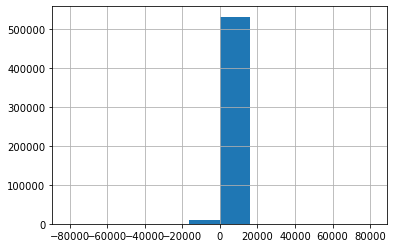

In [38]:
df['Quantity'].hist()

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

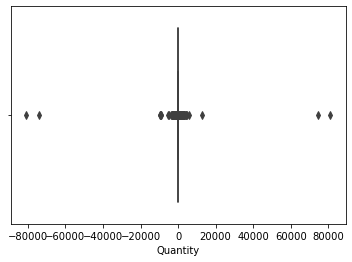

In [39]:
import seaborn as sns
sns.boxplot(df['Quantity'])

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


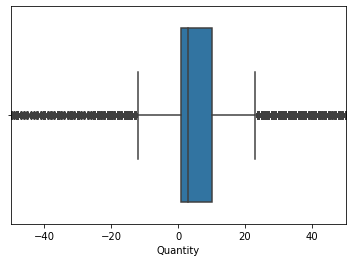

In [40]:
import matplotlib.pyplot as plt

sns.boxplot(df['Quantity'])
plt.xlim(-50,50)
plt.show()

In [41]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [42]:
import numpy as np

def outlier_iqr(data, column):
    global lower, upper
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3+cut_off
    print('IQR은', iqr, '이다')
    print('lower 기준값은', lower, '이다')
    print('upper 기준값은', upper, '이다')
    data1=data[data[column] > upper]   # 높은 이상치
    data2=data[data[column] < lower]   # 낮은 이상치
    return print('총 이상치의 개수는', data1.shape[0]+data2.shape[0], '이다')

In [43]:
outlier_iqr(df, 'Quantity')

IQR은 9.0 이다
lower 기준값은 -12.5 이다
upper 기준값은 23.5 이다
총 이상치의 개수는 58619 이다


In [44]:
58619/df.shape[0]

0.10817129813308138

- 이상치의 비율이 10%이며 매우 높고 낮은 수량은 충분히 나올 수 있기 때문에 이상치를 모두 제거하는 것은 조심스럽다
- 따라서 이상치를 제거하기 보단, Q1보다 낮은 그룹, Q1-Q3, Q3보다 높은 그룹으로 나누어 파생변수를 만들어보자

In [45]:
df['Quan_group']=np.where((df['Quantity']>=1)&(df['Quantity']<=10), 'Inside box', df['Quantity'])
df['Quan_group']=np.where(df['Quantity']<1, 'lower than box', df['Quan_group'])
df['Quan_group']=np.where(df['Quantity']>10, 'upper than box', df['Quan_group'])

In [46]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,weekday,Quan_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,Inside box
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Inside box
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,Inside box
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Inside box
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,Inside box
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,4,upper than box
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,4,Inside box
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,4,Inside box
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,4,Inside box


In [47]:
df.Quan_group.value_counts()

Inside box        398654
upper than box    132631
lower than box     10624
Name: Quan_group, dtype: int64

#### UnitPrice

In [48]:
df['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64

- unit price와 quantity를 곱한 total price 컬럼을 만들까 고민했지만, quantity가 마이너스인 행 때문에 total price가 음수인 행들이 존재한다
    - total price를 만드는 것은 아닌 것 같다..

In [49]:
# 정수화를 하기 전 반올림을 진행하자

In [50]:
df['UnitPrice_n']=round(df['UnitPrice'])
df[['UnitPrice_n', 'UnitPrice']]

,UnitPrice_n,UnitPrice
0,3.0,2.55
1,3.0,3.39
2,3.0,2.75
3,3.0,3.39
4,3.0,3.39
...,...,...
541904,1.0,0.85
541905,2.0,2.10
541906,4.0,4.15
541907,4.0,4.15


In [51]:
df.UnitPrice_n.dtype

dtype('float64')

In [52]:
df['UnitPrice_n']=df['UnitPrice_n'].astype('int')

In [53]:
df.UnitPrice_n.dtype

dtype('int32')

#### Country

In [54]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [55]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [56]:
len(df.Country.unique())

38

- country는 kind가 매우 많으므로 레이블 인코딩을 진행할시 나라에 따른 값 차이가 크게 나와 분석에 오류를 범할 수 있다
- 따라서 나라를 대륙별로 구분하여 카테고리화를 한 후 원-핫 인코딩을 진행한다

In [57]:
europe=['Spain', 'Portugal', 'Italy', 'Greece', 'Malta',
        'EIRE','United Kingdom','Norway','Lithuania','Iceland','Denmark','Sweden','Finland',
        'Poland','Czech Republic', 'Cyprus', 'European Community',
        'France','Netherlands','Germany', 'Switzerland','Belgium','Austria', 'Channel Islands']
asia=['Japan', 'Israel', 'Bahrain','Hong Kong', 'Singapore',
      'Lebanon', 'United Arab Emirates', 'Saudi Arabia']
america=['Canada', 'Brazil', 'USA']
africa=['RSA']
oceania=['Australia']
unknown=['Unspecified']

Coun_group=[]

for country in df['Country']:
    if country in europe:
        Coun_group.append('Europe')
    elif country in asia:
        Coun_group.append('Asia')
    elif country in america:
        Coun_group.append('America')
    elif country in africa:
        Coun_group.append('Africa')
    elif country in oceania:
        Coun_group.append('Oceania')
    else:
        Coun_group.append('Unspecified')

df['Coun_group']=Coun_group

df[['Country', 'Coun_group']]

,Country,Coun_group
0,United Kingdom,Europe
1,United Kingdom,Europe
2,United Kingdom,Europe
3,United Kingdom,Europe
4,United Kingdom,Europe
...,...,...
541904,France,Europe
541905,France,Europe
541906,France,Europe
541907,France,Europe


- europe을 N/S/W/E로 나눌까도 생각했지만, overfitting이 우려되어 기각
- america와 africa와 oceania를 하나로 묶을까 생각했지만, 분석에 오류를 범할 것 같아 기각

#### Description

In [58]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

- WHITE HANGING HEART T-LIGHT HOLDER를 y로 하자

In [59]:
df['Description'].fillna(0)
df['y_dscrp']=np.where(df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER', 1, 0)

In [60]:
df[['Description', 'y_dscrp']]

,Description,y_dscrp
0,WHITE HANGING HEART T-LIGHT HOLDER,1
1,WHITE METAL LANTERN,0
2,CREAM CUPID HEARTS COAT HANGER,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,0
4,RED WOOLLY HOTTIE WHITE HEART.,0
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,0
541905,CHILDREN'S APRON DOLLY GIRL,0
541906,CHILDRENS CUTLERY DOLLY GIRL,0
541907,CHILDRENS CUTLERY CIRCUS PARADE,0


In [61]:
df.y_dscrp.value_counts()

0    539540
1      2369
Name: y_dscrp, dtype: int64

### 인코딩

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   year         541909 non-null  int64         
 9   month        541909 non-null  int64         
 10  weekday      541909 non-null  int64         
 11  Quan_group   541909 non-null  object        
 12  UnitPrice_n  541909 non-null  int32         
 13  Coun_group   541909 non-null  object        
 14  y_dscrp      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(1), 

- Quan_group, Coun_group: 원-핫 인코딩

In [63]:
df_1=df[['Quantity', 'UnitPrice_n','CustomerID', 'year', 'month', 'weekday', 'y_dscrp']]
df_2=pd.get_dummies(df['Quan_group'])
df_3=pd.get_dummies(df['Coun_group'])

df_total=pd.concat([df_1, df_2, df_3], axis=1)

In [64]:
df_total

,Quantity,UnitPrice_n,CustomerID,year,month,weekday,y_dscrp,Inside box,lower than box,upper than box,Africa,America,Asia,Europe,Oceania,Unspecified
0,6,3,17850,2010,12,2,1,1,0,0,0,0,0,1,0,0
1,6,3,17850,2010,12,2,0,1,0,0,0,0,0,1,0,0
2,8,3,17850,2010,12,2,0,1,0,0,0,0,0,1,0,0
3,6,3,17850,2010,12,2,0,1,0,0,0,0,0,1,0,0
4,6,3,17850,2010,12,2,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,1,12680,2011,12,4,0,0,0,1,0,0,0,1,0,0
541905,6,2,12680,2011,12,4,0,1,0,0,0,0,0,1,0,0
541906,4,4,12680,2011,12,4,0,1,0,0,0,0,0,1,0,0
541907,4,4,12680,2011,12,4,0,1,0,0,0,0,0,1,0,0


In [65]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Quantity        541909 non-null  int64
 1   UnitPrice_n     541909 non-null  int32
 2   CustomerID      541909 non-null  int32
 3   year            541909 non-null  int64
 4   month           541909 non-null  int64
 5   weekday         541909 non-null  int64
 6   y_dscrp         541909 non-null  int32
 7   Inside box      541909 non-null  uint8
 8   lower than box  541909 non-null  uint8
 9   upper than box  541909 non-null  uint8
 10  Africa          541909 non-null  uint8
 11  America         541909 non-null  uint8
 12  Asia            541909 non-null  uint8
 13  Europe          541909 non-null  uint8
 14  Oceania         541909 non-null  uint8
 15  Unspecified     541909 non-null  uint8
dtypes: int32(3), int64(4), uint8(9)
memory usage: 27.4 MB


In [66]:
columns=['Inside box', 'lower than box', 'upper than box', 'Africa',
       'America', 'Asia', 'Europe', 'Oceania', 'Unspecified']

for column in columns:
    df_total[column]=df_total[column].astype('int')

df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Quantity        541909 non-null  int64
 1   UnitPrice_n     541909 non-null  int32
 2   CustomerID      541909 non-null  int32
 3   year            541909 non-null  int64
 4   month           541909 non-null  int64
 5   weekday         541909 non-null  int64
 6   y_dscrp         541909 non-null  int32
 7   Inside box      541909 non-null  int32
 8   lower than box  541909 non-null  int32
 9   upper than box  541909 non-null  int32
 10  Africa          541909 non-null  int32
 11  America         541909 non-null  int32
 12  Asia            541909 non-null  int32
 13  Europe          541909 non-null  int32
 14  Oceania         541909 non-null  int32
 15  Unspecified     541909 non-null  int32
dtypes: int32(12), int64(4)
memory usage: 41.3 MB


In [67]:
df_total.isna().sum()

Quantity          0
UnitPrice_n       0
CustomerID        0
year              0
month             0
weekday           0
y_dscrp           0
Inside box        0
lower than box    0
upper than box    0
Africa            0
America           0
Asia              0
Europe            0
Oceania           0
Unspecified       0
dtype: int64

### 모델링

In [68]:
df_x = df_total.drop('y_dscrp',axis=1)
df_y = df_total['y_dscrp']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=82)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
dt_clf = DecisionTreeClassifier(random_state=111)
rf_clf = RandomForestClassifier(random_state=111)
lr_clf = LogisticRegression(solver ='liblinear')

In [71]:
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))


정확도:0.9942
정확도:0.9946
정확도:0.9955
